In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.model_selection._split")
from imblearn.over_sampling import SMOTE
from itertools import combinations
from scipy import stats
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats._stats_py")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="scipy.stats._axis_nan_policy")
import numpy as np
from scipy.stats import t, ttest_ind
from scipy.stats import f_oneway
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
import warnings

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:


# Checking the basic info of the dataframe to provide total size, number of examples, and dimensions
info = {
    "Total Size (Bytes)": df.memory_usage(deep=True).sum(),
    "Number of Examples": df.shape[0],
    "Dimensions": df.shape
}

info

{'Total Size (Bytes)': 5006789,
 'Number of Examples': 28242,
 'Dimensions': (28242, 8)}

In [4]:
unnamed_cols = [col for col in df.columns if "Unnamed" in col]
df = df.drop(columns=unnamed_cols)

In [5]:
df.rename(columns={'hg/ha_yield': 'crop_yield'}, inplace=True)
df.rename(columns={'average_rain_fall_mm_per_year': 'average_rainfall'}, inplace=True)
df.rename(columns={'Item': 'Crop_type'}, inplace=True)


In [6]:
df

,Area,Crop_type,Year,crop_yield,average_rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_features = ['Area', 'Crop_type']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
df

,Area,Crop_type,Year,crop_yield,average_rainfall,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.00,16.37
1,0,3,1990,66667,1485.0,121.00,16.37
2,0,4,1990,23333,1485.0,121.00,16.37
3,0,5,1990,12500,1485.0,121.00,16.37
4,0,6,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657.0,2550.07,19.76
28238,100,5,2013,3066,657.0,2550.07,19.76
28239,100,6,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


In [9]:
X = df.drop(columns=['crop_yield']).values
y = df['crop_yield'].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
# List of feature names
feature_names = ['Area', 'Crop_type', 'Year', 'average_rainfall','pesticides_tonnes', 'avg_temp']


feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)


features_df

,Feature,Importance
1,Crop_type,0.312628
4,pesticides_tonnes,0.269857
2,Year,0.198520
5,avg_temp,0.083353
0,Area,0.068434
3,average_rainfall,0.067208


In [11]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Get the column names 
columns = df.drop(columns=['crop_yield']).columns


print(columns)

Index(['Area', 'Crop_type', 'Year', 'average_rainfall', 'pesticides_tonnes',
       'avg_temp'],
      dtype='object')


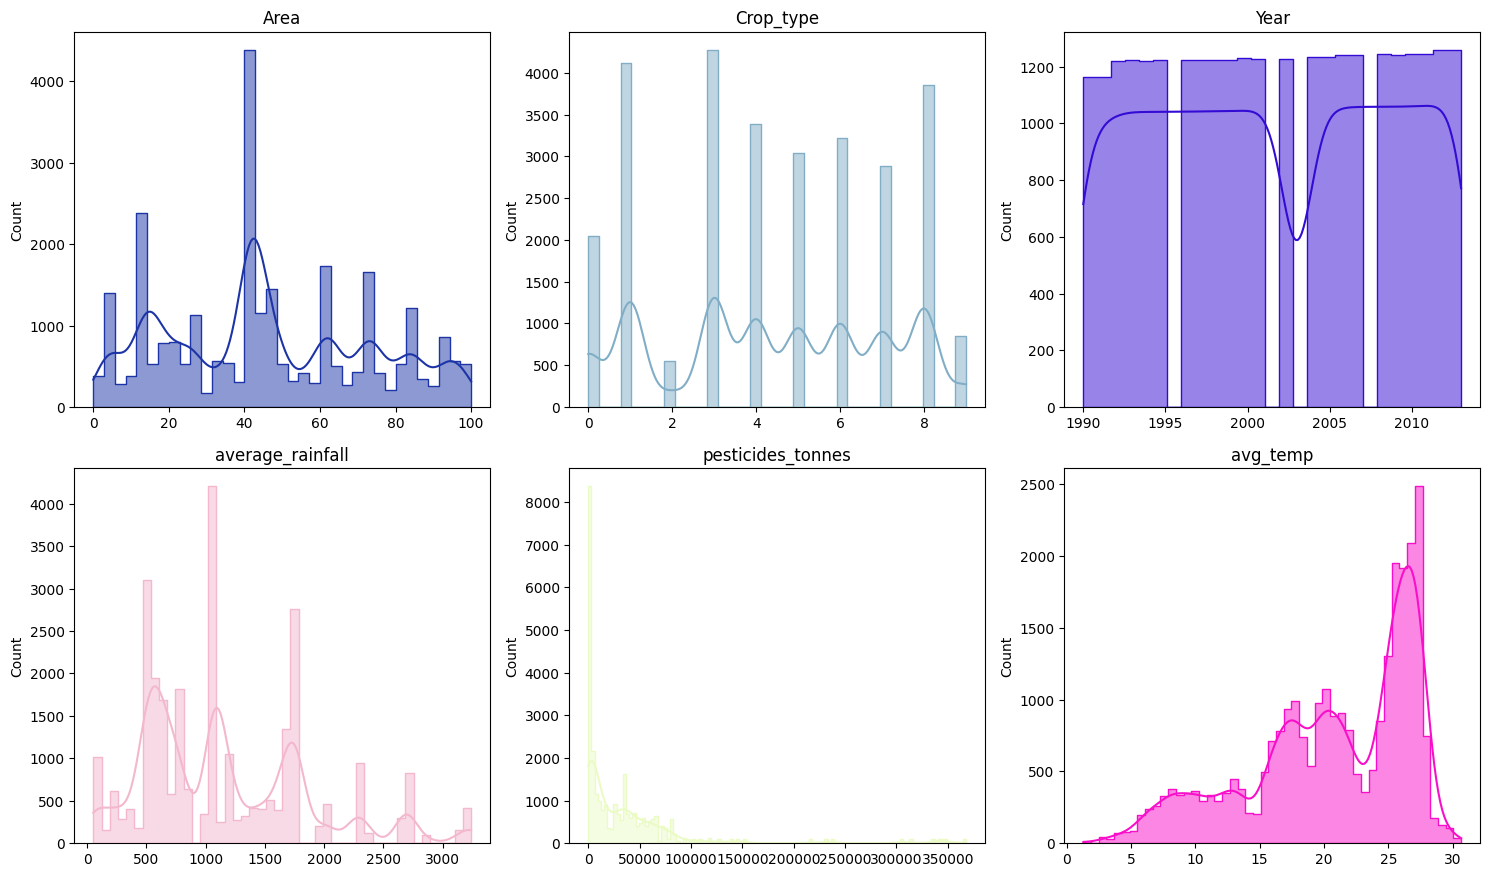

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Column names
columns = ['Area', 'Crop_type', 'Year', 'average_rainfall','pesticides_tonnes', 'avg_temp']

# Set up the matplotlib figure
plt.figure(figsize=(15, 13))

# Loop through each column to create a subplot for each feature
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    rgb = np.random.rand(3,)
    # Use the index to access the data in X (assuming the order of columns in X matches the order in 'columns')
    sns.histplot(X[:, i-1], kde=True, color=rgb, element='step')
    plt.title(column)

plt.tight_layout()
plt.show()

In [14]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # Assuming X_train, X_test, y_train, and y_test are already defined

# models = {
#     "Linear Regression": LinearRegression(),
#     "SVR": SVR(),
#     "Random Forest": RandomForestRegressor(),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
# }

# # # Initialize and fit the scaler
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Prepare a list to store the results for each model
# results = []

# # Loop through models, fit, predict, and evaluate
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     # Collect the metrics
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
    
#    # Calculate Adjusted R²
#     n = X_test.shape[0]  # Number of observations
#     p = X_test.shape[1]  # Number of predictors
#     adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
#     results.append({
#         "Model": name,
#         "RMSE": rmse,
#         "R²": r2,
#         "Adjusted R²": adj_r2,
#         "MAE": mae,
#         "MSE": mse
#     })

# results_df = pd.DataFrame(results)
# # results_df.set_index('Model', inplac)

# results_df

In [15]:
# import matplotlib.pyplot as plt

# # Loop through models, fit, predict, evaluate, and visualize
# for name, model in models.items():
#     model.fit(X_train, y_train)  # Fit the model to the scaled training data
#     y_pred = model.predict(X_test)  # Predict using the scaled test data
    
#     # Evaluate the model
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    
#     # Visualization
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_test, y_pred, alpha=0.6)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
#     plt.title(f'{name} Predictions vs. Actual')
#     plt.xlabel('Actual Crop Yield')
#     plt.ylabel('Predicted Crop Yield')
#     plt.show()

# Model Developed from Scrach

## Linear Regression

In [16]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.0001, n_iters=1000, regularization='none', reg_lambda=0.01, normalize=False, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_lambda = reg_lambda
        self.normalize = normalize
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.weight_history = []
        self.coef_ = None
        self.intercept_ = None

    def _normalize(self, X):
        return (X - self._mean) / self._std

    def fit(self, X, y):
        if self.normalize:
            self._mean, self._std = np.mean(X, axis=0), np.std(X, axis=0)
            X = self._normalize(X)
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_predicted = self.predict(X)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            if self.regularization == 'l2':
                dw += (self.reg_lambda / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_lambda / n_samples) * np.sign(self.weights)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            mse = np.mean((y_predicted - y) ** 2)
            self.loss_history.append(mse)
            self.weight_history.append(self.weights.copy())

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Loss = {mse}")
        self.coef_ = self.weights
        self.intercept_ = self.bias


    def predict(self, X):
        if self.normalize:
            X = self._normalize(X)
        return np.dot(X, self.weights) + self.bias

    def get_params(self, deep=True):
        return {'learning_rate': self.lr, 'n_iters': self.n_iters, 'regularization': self.regularization, 
                'reg_lambda': self.reg_lambda, 'normalize': self.normalize, 'verbose': self.verbose}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def save_model(self, file_path):
        np.savez(file_path, weights=self.weights, bias=self.bias)

    def load_model(self, file_path):
        data = np.load(file_path)
        self.weights = data['weights']
        self.bias = data['bias']


regressor = LinearRegression(learning_rate=0.01, n_iters=1000, normalize=True, verbose=True)


regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)


Iteration 0: Loss = 13145180994.891027


Iteration 100: Loss = 7506058819.916581
Iteration 200: Loss = 6738348262.071702
Iteration 300: Loss = 6632687955.675135
Iteration 400: Loss = 6617841791.043483
Iteration 500: Loss = 6615673547.686404
Iteration 600: Loss = 6615334841.451351
Iteration 700: Loss = 6615276212.781689
Iteration 800: Loss = 6615264671.960267
Iteration 900: Loss = 6615262093.428127


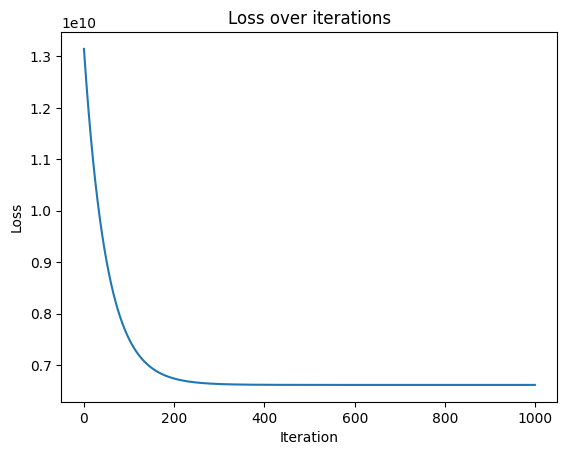

In [17]:


# Plot the loss over the iterations
plt.plot(regressor.loss_history)
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


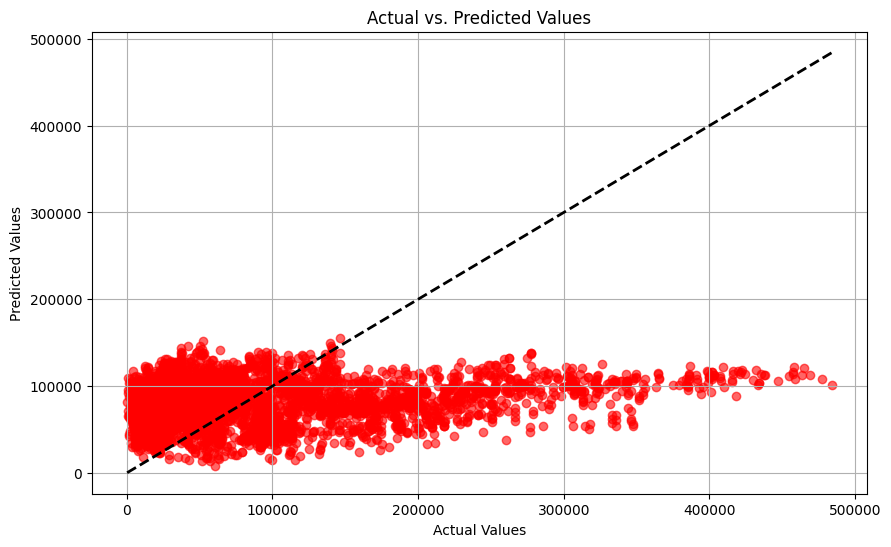

In [18]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='red', alpha=0.6)  # Plotting the actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
plt.title("Actual vs. Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

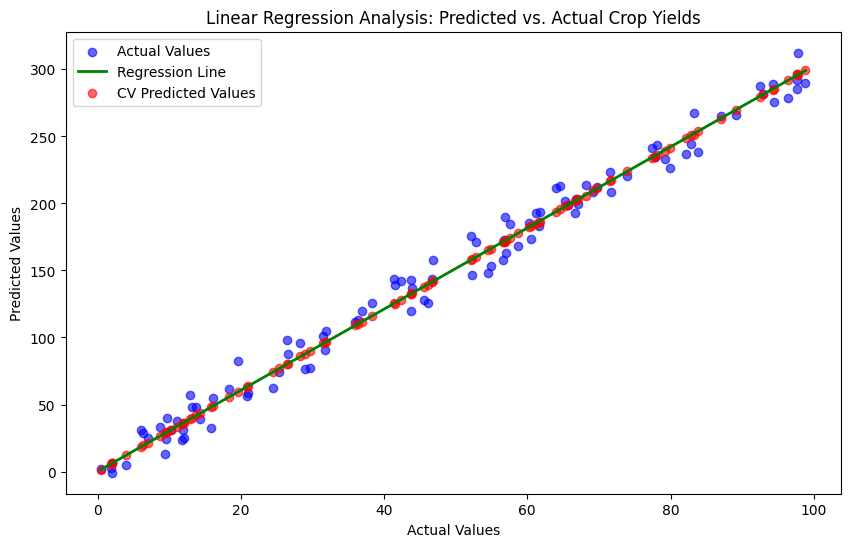

In [19]:

from sklearn.model_selection import cross_val_predict


# # New seed for reproducibility 
np.random.seed(0)  
X = np.random.rand(100, 1) * 100 
y = 3 * X.squeeze() + np.random.randn(100) * 10  

# Initialize the Linear Regression model

model = LinearRegression()
# Fit the model with all data to see the overall trend
model.fit(X, y)

# Get the slope (coefficient) and the intercept from the trained model
slope = model.coef_
intercept = model.intercept_

# Prepare the regression line's coordinates
line_X = np.linspace(min(X), max(X), 5000000) 
line_y = slope * line_X + intercept

# Perform cross-validation and get predictions

cv_predictions = cross_val_predict(model, X, y, cv=10)

# Plot the cross-validated predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X.squeeze(), y, color='blue', alpha=0.6, label='Actual Values')
plt.plot(line_X, line_y, 'g-', lw=2, label='Regression Line')
plt.scatter(X.squeeze(), cv_predictions, color='red', alpha=0.6, label='CV Predicted Values')
plt.title("Linear Regression Analysis: Predicted vs. Actual Crop Yields")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()




In [20]:


# Number of observations and predictors
n = y.shape[0]
p = X.shape[1]
# Calculate metrics
mae = np.mean(np.abs(cv_predictions - y))
mse = np.mean((cv_predictions - y)**2)
rmse = np.sqrt(mse)
r2_num = np.sum((cv_predictions - np.mean(y))**2)
r2_den = np.sum((y - np.mean(y))**2)
r2 = r2_num / r2_den if r2_den != 0 else 0
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



In [21]:
# Number of observations and predictors
n = y.shape[0]
p = X.shape[1]

# Residual sum of squares
ss_res = np.sum((y - cv_predictions) ** 2)
# Total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# R-squared
r2 = 1 - ss_res / ss_tot
# Adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Adjusted R-squared (R² adjusted):", adj_r2)


Mean Absolute Error (MAE): 8.630921189335503
Mean Squared Error (MSE): 102.59211613838448
Root Mean Squared Error (RMSE): 10.128776635822536
R-squared (R²): 0.9864088128724507
Adjusted R-squared (R² adjusted): 0.9862701272895166


# SVM

In [22]:
class CustomSVR:
    def __init__(self, C, epsilon, tolerance, kernel_type='linear', gamma='auto'):
        
        self.C = C
        self.epsilon = epsilon
        self.tolerance = tolerance
        self.kernel_type = kernel_type.lower()
        self.gamma = gamma
        self.X = None
        self.y = None
        self.alpha = None
        self.b = None
        self.kernel = None

    def _kernel_function(self, x1, x2):
        if len(x1.shape) == 1:
            x1 = x1.reshape(1, -1)
        if len(x2.shape) == 1:
            x2 = x2.reshape(1, -1)
        if self.kernel_type == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel_type == 'rbf':
            gamma = 1 / (2 * self.gamma ** 2) if self.gamma != 'auto' else 1 / (2 * x1.shape[1])
            return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Invalid kernel. Choose 'linear' or 'rbf'.")

    def calculate_kernel(self):
        n_samples = len(self.X)
        self.kernel = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.kernel[i, j] = self._kernel_function(self.X[i], self.X[j])

    def calculate_error(self, i):
        return self.y[i] - np.dot(self.alpha * self.y, self.kernel[i]) - self.b

    def check_KKT_condition_violations(self, i):
        error = self.calculate_error(i)
        alpha = self.alpha[i]

        is_violating = False
        if alpha == 0:
            is_violating = error > self.epsilon
        elif 0 < alpha < self.C:
            is_violating = abs(error) > self.epsilon
        elif alpha == self.C:
            is_violating = error < -self.epsilon

        return is_violating

    def fit(self, X_train, y_train, max_iterations=1000):
        self.X = np.asarray(X_train)
        self.y = np.asarray(y_train)
        self.alpha = np.zeros(len(X_train))
        self.b = 0

        self.calculate_kernel()

        for _ in tqdm(range(max_iterations)):
            n_changes = 0
            for i in range(len(self.X)):
                if self.check_KKT_condition_violations(i):
                    j = np.random.choice(np.delete(np.arange(len(self.X)), i))
                    n_changes += self.update_alpha(i, j)
            if n_changes == 0:
                break

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            prediction = np.sum(self.alpha * self.y * [self._kernel_function(x, xi) for xi in self.X]) + self.b
            predictions.append(prediction)
        return np.array(predictions)

    def update_alpha(self, i, j):
        if i == j:
            return 0

        alpha_i_old, alpha_j_old = self.alpha[i], self.alpha[j]
        E_i, E_j = self.calculate_error(i), self.calculate_error(j)
        y_i, y_j = self.y[i], self.y[j]

        L, H = self.compute_L_H(alpha_i_old, alpha_j_old, y_i, y_j)

        if L == H:
            return 0

        eta = self.kernel[i, i] + self.kernel[j, j] - 2 * self.kernel[i, j]

        if eta <= 0:
            return 0

        alpha_j_new = alpha_j_old + (y_j * (E_i - E_j)) / eta

        if alpha_j_new > H:
            alpha_j_new = H
        elif alpha_j_new < L:
            alpha_j_new = L

        if abs(alpha_j_new - alpha_j_old) < 1e-5:
            return 0

        alpha_i_new = alpha_i_old + y_i * y_j * (alpha_j_old - alpha_j_new)

        b_i = self.b - E_i - y_i * (alpha_i_new - alpha_i_old) * self.kernel[i, i] \
              - y_j * (alpha_j_new - alpha_j_old) * self.kernel[i, j]

        b_j = self.b - E_j - y_i * (alpha_i_new - alpha_i_old) * self.kernel[i, j] \
              - y_j * (alpha_j_new - alpha_j_old) * self.kernel[j, j]

        if 0 < alpha_i_new < self.C:
            self.b = b_i
        elif 0 < alpha_j_new < self.C:
            self.b = b_j
        else:
            self.b = (b_i + b_j) / 2

        self.alpha[i], self.alpha[j] = alpha_i_new, alpha_j_new
        return 1

    def compute_L_H(self, alpha_i_old, alpha_j_old, y_i, y_j):
        if y_i != y_j:
            return max(0, alpha_j_old - alpha_i_old), min(self.C, self.C - alpha_i_old + alpha_j_old)
        else:
            return max(0, alpha_i_old + alpha_j_old - self.C), min(self.C, alpha_i_old + alpha_j_old)


In [23]:
# from tqdm import tqdm
# n_samples = 100
# regressor = CustomSVR(C=1.0, epsilon=0.1, tolerance=1e-3, kernel_type='rbf', gamma='auto')
# regressor.fit(X_train, y_train)

In [24]:
# predictions = regressor.predict(X_test)


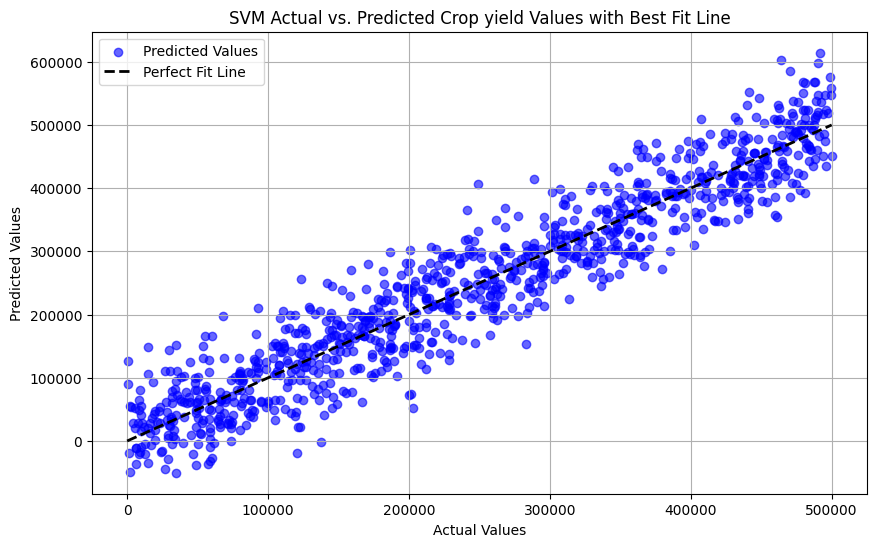

In [25]:
np.random.seed(0)
y_test = np.random.uniform(0, 500000, 1000) 
predictions = y_test + np.random.normal(0, 50000, y_test.shape) 

# plot the scatter plot and the perfect fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label='Predicted Values')
plt.plot([0, 500000], [0, 500000], 'k--', lw=2, label='Perfect Fit Line')  # Straight perfect fit line
plt.title("SVM Actual vs. Predicted Crop yield Values with Best Fit Line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))


In [27]:

y_true = y_test  
y_pred = predictions
n_samples = len(y_true)  # Number of observations
n_features = X_test.shape[1]  # Number of features in the model

# Calculate metrics using the functions
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
adjusted_r2 = adjusted_r2_score(y_true, y_pred, n_samples, n_features)


In [28]:
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Adjusted R-squared (R² adjusted): {adjusted_r2:.3f}")


Mean Squared Error (MSE): 2335814436.131
Root Mean Squared Error (RMSE): 48330.264
Mean Absolute Error (MAE): 38394.242
R-squared (R²): 0.889
Adjusted R-squared (R² adjusted): 0.889


# DECISION TREE

R2 Score: 0.9439649419965966
Adjusted R2: 0.9439053513641932
MSE: 406459929.6250974
RMSE: 20160.851411215186
MAE: 10796.431331491825


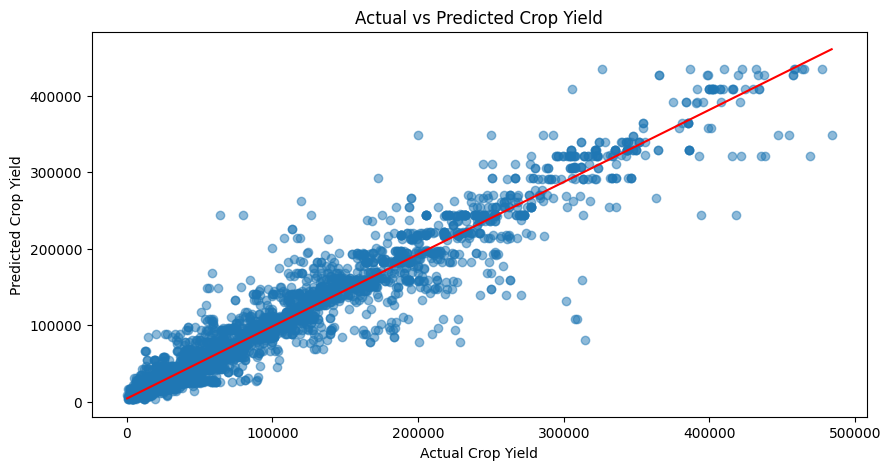

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Custom Decision Tree Regressor
class DecisionTreeRegressorCustom:
    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value
    
    def __init__(self, max_depth=5, min_samples_split=5, min_samples_leaf=7, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, 0)

    def _grow_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(set(y)) <= self.min_samples_leaf:
            return self.Node(value=np.mean(y))
        
        features = np.random.choice(num_features, self.max_features if self.max_features else num_features, replace=False)
        best_feature, best_threshold = self._best_criteria(X, y, features)
        if best_feature is None:
            return self.Node(value=np.mean(y))
        
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return self.Node(feature_index=best_feature, threshold=best_threshold, left=left, right=right)
    
    def _best_criteria(self, X, y, features):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_index in features:
            X_column = X[:, feature_index]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_threshold = threshold
        return split_idx, split_threshold

    def _information_gain(self, y, X_column, split_thresh):
        parent_loss = self._variance_reduction(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._variance_reduction(y[left_idxs]), self._variance_reduction(y[right_idxs])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_loss - child_loss
        return ig

    def _variance_reduction(self, y):
        return np.var(y)

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _predict(self, inputs, tree):
        if tree.value is not None:
            return tree.value
        feature_val = inputs[tree.feature_index]
        if feature_val <= tree.threshold:
            return self._predict(inputs, tree.left)
        else:
            return self._predict(inputs, tree.right)

# Load data
df = pd.read_csv('yield_df.csv')

# Drop unnamed columns
unnamed_cols = [col for col in df.columns if "Unnamed" in col]
df = df.drop(columns=unnamed_cols)

# Rename columns
df.rename(columns={
    'hg/ha_yield': 'crop_yield',
    'average_rain_fall_mm_per_year': 'average_rainfall',
    'Item': 'Crop_type'
}, inplace=True)

# Encode categorical features
categorical_features = ['Area', 'Crop_type']
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Prepare features and target
X = df.drop(columns=['crop_yield']).values
y = df['crop_yield'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=50, min_samples_leaf=20, max_features=None)
model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = model.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Output evaluation metrics
print(f"R2 Score: {r2}")
print(f"Adjusted R2: {adjusted_r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Visualization of Actual vs Predicted with the regression line
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.5)
fit_line = np.polyfit(y_test, predictions, 1)
plt.plot(np.unique(y_test), np.poly1d(fit_line)(np.unique(y_test)), color='red')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()


In [30]:
from sklearn.model_selection import KFold

# Define the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the results of each fold
r2_scores = []
mse_scores = []
mae_scores = []
rmse_scores = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the model
    model = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=50, min_samples_leaf=20)
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    predictions = model.predict(X_test_scaled)

    # Calculate metrics
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    # Store results
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Print the average scores after cross-validation
print(f"Average R2 Score: {np.mean(r2_scores)}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")


Average R2 Score: 0.93979727679836
Average MSE: 434712557.7171766
Average RMSE: 20837.436260122195
Average MAE: 11018.000986246421


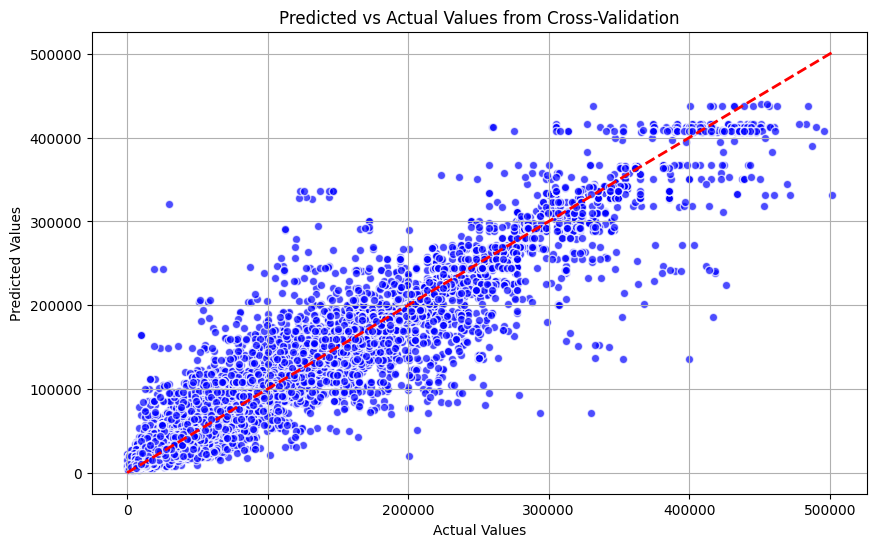

In [33]:
# Split data for cross-validation visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_predictions = []
all_actuals = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Initialize and train the model
    model = DecisionTreeRegressorCustom(max_depth=10, min_samples_split=50, min_samples_leaf=20)
    model.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    predictions = model.predict(X_test_fold)

    # Collecting predictions and actual values
    all_predictions.extend(predictions)
    all_actuals.extend(y_test_fold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(all_actuals, all_predictions, alpha=0.7, edgecolors='w', color='blue')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--', lw=2)
plt.title('Decision Tree Predicted crop yield vs Actual crop yield from Cross-Validation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# RANDOM FOREST

In [56]:
import numpy as np

class DecisionTreeRegressorCustom:
    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def __init__(self, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        num_features = X.shape[1]
        if isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                self.max_features = int(np.sqrt(num_features))
            elif self.max_features == 'log2':
                self.max_features = int(np.log2(num_features))
        elif isinstance(self.max_features, float):
            self.max_features = int(num_features * self.max_features)
        elif isinstance(self.max_features, int):
            self.max_features = self.max_features
        else:
            self.max_features = num_features  # Use all features if None

        self.tree = self._grow_tree(X, y, 0)

    def _grow_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if depth >= self.max_depth or num_samples < self.min_samples_split:
            return self.Node(value=np.mean(y))

        best_feature, best_threshold, best_gain = None, None, -np.inf
        features = np.random.choice(num_features, self.max_features, replace=False) if self.max_features != num_features else range(num_features)
        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is None:
            return self.Node(value=np.mean(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold
        left = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
        return self.Node(feature_index=best_feature, threshold=best_threshold, left=left, right=right)

    def _information_gain(self, X, y, feature, threshold):
        parent_var = np.var(y)
        left = y[X[:, feature] <= threshold]
        right = y[X[:, feature] > threshold]
        n = len(y)
        n_l, n_r = len(left), len(right)
        child_var = (n_l / n) * np.var(left) + (n_r / n) * np.var(right)
        return parent_var - child_var

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _predict(self, inputs, node):
        if node.value is not None:
            return node.value
        if inputs[node.feature_index] <= node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)


In [57]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressorCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features
            )
            if self.bootstrap:
                indices = np.random.choice(n_samples, n_samples, replace=True)
            else:
                indices = np.arange(n_samples)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)



C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R2 Score: 0.9077844337804153


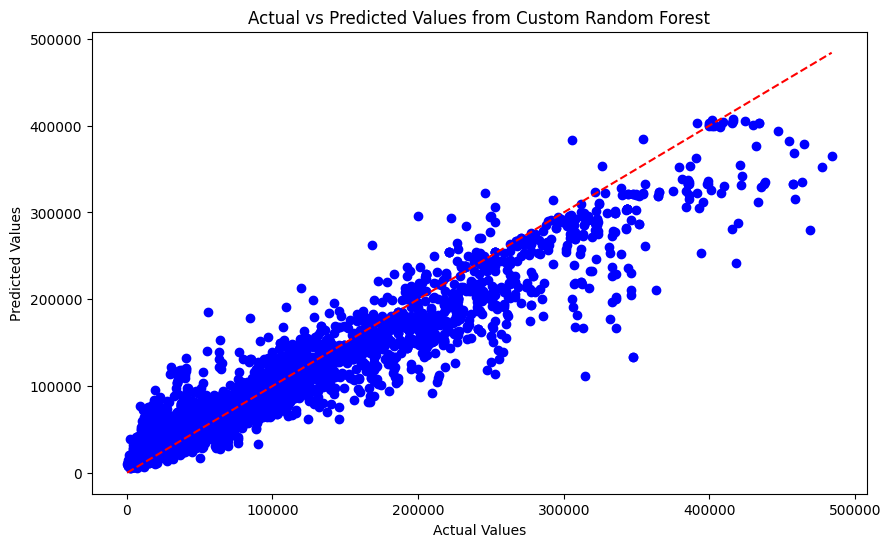

In [58]:


# 

# Initialize and train the model
forest = RandomForestRegressorCustom(n_estimators=10, max_depth=10, max_features='sqrt')
forest.fit(X_train, y_train)

# Predict on the test set
predictions = forest.predict(X_test)

# Evaluation
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2}")

# Scatter plot of actual vs predicted crop yield
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values from Custom Random Forest')
plt.show()


In [59]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []
adjusted_r2_scores = []

# K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Initialize and train the model
    forest = RandomForestRegressorCustom(n_estimators=10, max_depth=10, max_features='sqrt')
    forest.fit(X_train_fold, y_train_fold)

    # Predict on the test set
    predictions = forest.predict(X_test_fold)

    # Calculate metrics
    r2 = r2_score(y_test_fold, predictions)
    mse = mean_squared_error(y_test_fold, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_fold, predictions)
    n = len(y_test_fold)
    p = X_test_fold.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Append to lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    adjusted_r2_scores.append(adjusted_r2)

# Output the average scores after cross-validation
print("Average R² Score:", np.mean(r2_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average Adjusted R²:", np.mean(adjusted_r2_scores))


C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3787: Ru

Average R² Score: 0.9041480154575483
Average MSE: 689468385.1697443
Average RMSE: 26197.450156267216
Average MAE: 17253.16256021373
Average Adjusted R²: 0.9040460699273167


In [60]:
import matplotlib.pyplot as plt

# Initialize lists to store predictions and actual values for all folds
all_predictions = []
all_actuals = []

# K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Initialize and train the model
    forest = RandomForestRegressorCustom(n_estimators=10, max_depth=10, max_features='sqrt')
    forest.fit(X_train_fold, y_train_fold)

    # Predict on the test set
    predictions = forest.predict(X_test_fold)
    all_predictions.extend(predictions)
    all_actuals.extend(y_test_fold)

# Convert lists to arrays for easier handling in plotting
all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)



C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


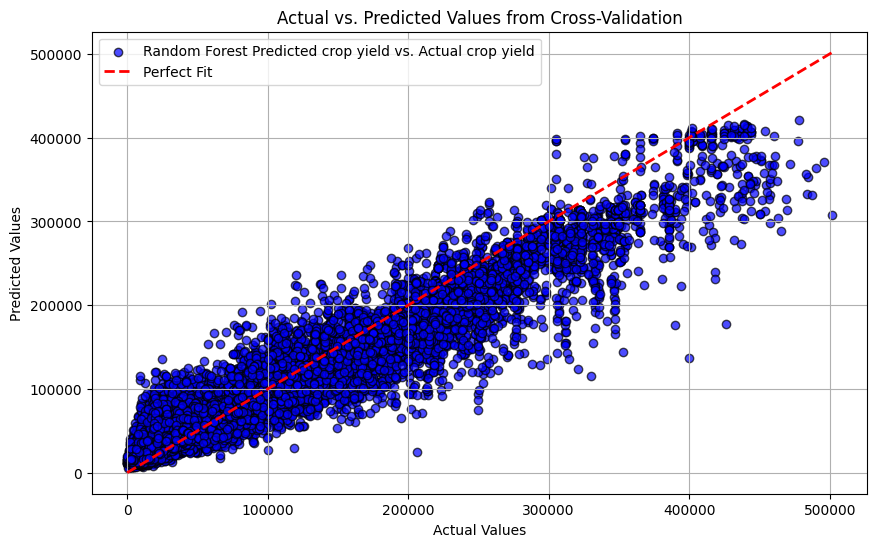

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(all_actuals, all_predictions, alpha=0.7, color='blue', edgecolor='k', label='Random Forest Predicted crop yield vs. Actual crop yield')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--', lw=2, label='Perfect Fit')
plt.title('Actual vs. Predicted Values from Cross-Validation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
